# Estimating speed of light from Newcomb's experiment - normal data with non-informative prior
From Gelman et. al Chapter 3.2

*Simon Newcomb set up an experiment in 1882 to measure the speed of light. Newcomb measured the amount of time required for light to travel a distance of 7442 meters. (...) There are two unusually low measurements and then a cluster of measurements that are approximately symmetrically distributed. We (inappropriately) apply the normal model, assuming that all 66 measurements are independent draws from a normal distribution with mean $\mu$ and variance $\sigma$. The main substantive goal is posterior inference for $\mu$. The mean of the 66 measurements is $\bar{y} = 26.2$, and the sample standard deviation is $s = 10.8$. Assuming the noninformative prior distribution $p(\mu, \sigma^2) \propto \sigma^{-2}$, a 95% central posterior interval for $\mu$ is obtained from the $t_{65}$ marginal posterior distribution of $\mu$ as $\bar{y} \pm 1.997s/\sqrt{66} = [23.6, 28.8]$.*

It should be noted, that data are recorded as deviations from 24,800 ns.

We will compare these results with a stan model

In [54]:
import scipy.stats as stats
import numpy as np
import arviz as az
import matplotlib.pyplot as plt
import matplotlib as mpl
from cmdstanpy import CmdStanModel

light="#FFFCDC"
light_highlight="#FEF590"
mid="#FDED2A"
mid_highlight="#f0dc05"
dark="#EECA02"
dark_highlight="#BB9700"
green="#00FF00"
light_grey="#DDDDDD"


plt.style.context('seaborn-white')
mpl.rcParams['figure.dpi']= 200

import pandas as pd

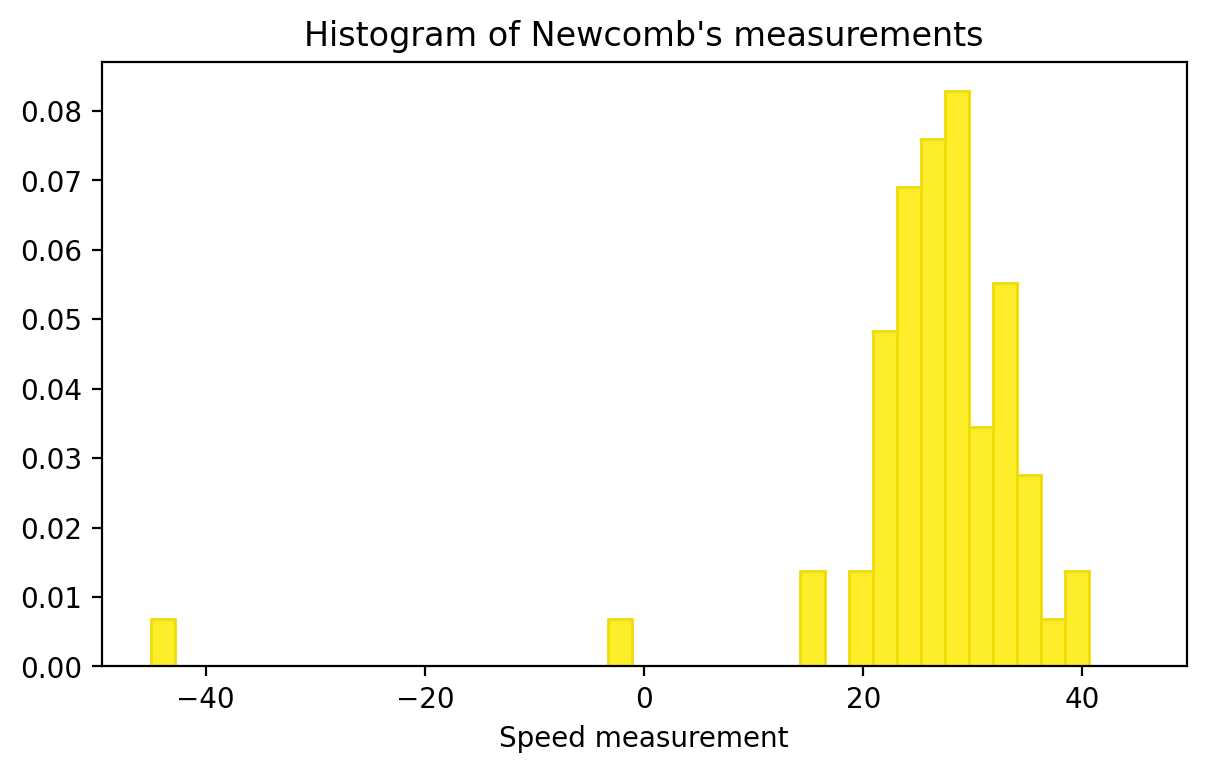

In [77]:
df=pd.read_table('light.txt',header=None,names=['V'])
V=df.V.to_numpy()
fig, ax = plt.subplots(1, 1, figsize=(7, 4))
ax.hist(V,bins=np.linspace(-45,45,42),color=mid,edgecolor=mid_highlight,density=True)
plt.xlabel('Speed measurement')
plt.title(str("Histogram of Newcomb's measurements"))
plt.show(ax)

In [56]:
model=CmdStanModel(stan_file='newcomb_fit_1.stan')

INFO:cmdstanpy:compiling stan program, exe file: /var/folders/96/_4tl8xsx4tx9rj0ykk82715h0000gn/T/tmpa5hxtzon/tmpup6hw2fj
INFO:cmdstanpy:compiler options: stanc_options=None, cpp_options=None
INFO:cmdstanpy:compiled model file: /Users/jerzybaranowski/GitHub/KAIR-ISZ/public_lectures/Data Analytics/Topic 5 - Multiparameter models/Newcomb/newcomb_fit_1


In [57]:
with open('newcomb_fit_1.stan', 'r') as file:
    print(file.read())

data {
  int N; //number of samples
  real y[N];//measurements
}

parameters {
  real<lower=0> sigma;
  real mu;
}

model {
  target+=-2*log(sigma);
  target+=normal_lpdf(y|mu,sigma);
}

generated quantities {
    vector[N] log_lik;
    real y_hat[N];
    for (j in 1:N) {
      log_lik[j] = normal_lpdf(y[j] | mu, sigma);
      y_hat[j] = normal_rng(mu,sigma);
    }
}



In [58]:
data = dict(N = len(V),y = V)

In [59]:
fit = model.sample(data = data,seed = 27042020)

INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:start chain 2
INFO:cmdstanpy:start chain 3
INFO:cmdstanpy:start chain 4
INFO:cmdstanpy:finish chain 4
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:finish chain 2
INFO:cmdstanpy:finish chain 3


In [60]:
fit.diagnose()

INFO:cmdstanpy:Processing csv files: /var/folders/96/_4tl8xsx4tx9rj0ykk82715h0000gn/T/tmpc8_lqvdd/newcomb_fit_1-202104251800-1-w0mdplcc.csv, /var/folders/96/_4tl8xsx4tx9rj0ykk82715h0000gn/T/tmpc8_lqvdd/newcomb_fit_1-202104251800-2-zj5gd2i9.csv, /var/folders/96/_4tl8xsx4tx9rj0ykk82715h0000gn/T/tmpc8_lqvdd/newcomb_fit_1-202104251800-3-sy67sa6j.csv, /var/folders/96/_4tl8xsx4tx9rj0ykk82715h0000gn/T/tmpc8_lqvdd/newcomb_fit_1-202104251800-4-ig2gqnwb.csv

Checking sampler transitions treedepth.
Treedepth satisfactory for all transitions.

Checking sampler transitions for divergences.
No divergent transitions found.

Checking E-BFMI - sampler transitions HMC potential energy.
E-BFMI satisfactory for all transitions.

Effective sample size satisfactory.

Split R-hat values satisfactory all parameters.

Processing complete, no problems detected.


'Processing csv files: /var/folders/96/_4tl8xsx4tx9rj0ykk82715h0000gn/T/tmpc8_lqvdd/newcomb_fit_1-202104251800-1-w0mdplcc.csv, /var/folders/96/_4tl8xsx4tx9rj0ykk82715h0000gn/T/tmpc8_lqvdd/newcomb_fit_1-202104251800-2-zj5gd2i9.csv, /var/folders/96/_4tl8xsx4tx9rj0ykk82715h0000gn/T/tmpc8_lqvdd/newcomb_fit_1-202104251800-3-sy67sa6j.csv, /var/folders/96/_4tl8xsx4tx9rj0ykk82715h0000gn/T/tmpc8_lqvdd/newcomb_fit_1-202104251800-4-ig2gqnwb.csv\n\nChecking sampler transitions treedepth.\nTreedepth satisfactory for all transitions.\n\nChecking sampler transitions for divergences.\nNo divergent transitions found.\n\nChecking E-BFMI - sampler transitions HMC potential energy.\nE-BFMI satisfactory for all transitions.\n\nEffective sample size satisfactory.\n\nSplit R-hat values satisfactory all parameters.\n\nProcessing complete, no problems detected.'

In [61]:
mu = fit.stan_variable('mu')

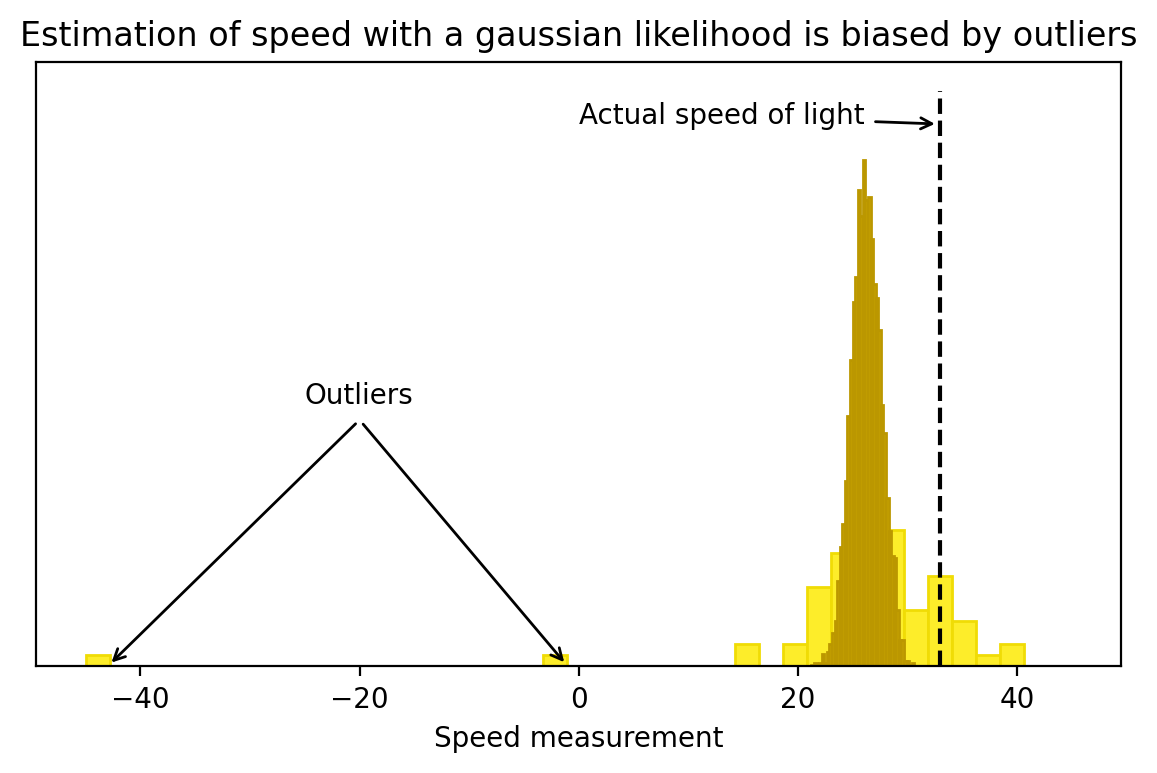

In [76]:
fig, ax = plt.subplots(1, 1, figsize=(7, 4))
ax.hist(V,bins=np.linspace(-45,45,42),color=mid,edgecolor=mid_highlight,density=True)
ax.hist(mu,bins=40,color=dark,edgecolor=dark_highlight,density=True)
ax.plot([33,33],[0,0.35],color='black',linestyle='--')
ax.annotate('',xy=(-43,0),xytext=(-20, 0.15),arrowprops={'arrowstyle':'->'})
ax.annotate('',xy=(-1,0),xytext=(-20, 0.15),arrowprops={'arrowstyle':'->'})
ax.text(x=-25,y=0.16,s='Outliers')
ax.annotate('Actual speed of light',xy=(33,0.33),xytext=(0, 0.33),arrowprops={'arrowstyle':'->'})
ax.set_yticks([])
ax.set_title('Estimation of speed with a gaussian likelihood is biased by outliers')
plt.xlabel('Speed measurement')
plt.show(ax)

In [63]:
print('Mean: {:4.2f}'.format(np.mean(mu)))
print('95% confidence interval: ',['{:4.2f}'.format(k) for k in az.hdi(mu,.95)])

Mean: 26.23
95% confidence interval:  ['23.77', '28.92']


In [64]:
az.summary(fit,var_names=['mu'],kind='stats',hdi_prob=.95)

,mean,sd,hdi_2.5%,hdi_97.5%
mu,26.23,1.334,23.772,28.919


In [ ]:
Actual speed of light in this data scale is 33. Two outliers at -44 and -2 are certainly skewing our estimate. We can try to improve our estimate with more robust Student t model.

### Posterior predictive check

In [112]:
fit_id = az.from_cmdstanpy(posterior=fit,
                           log_likelihood='log_lik',
                           posterior_predictive='y_hat',
                           observed_data={'y':data['y']} )
fit_id

Inference data with groups:
	> posterior
	> posterior_predictive
	> log_likelihood
	> sample_stats
	> observed_data

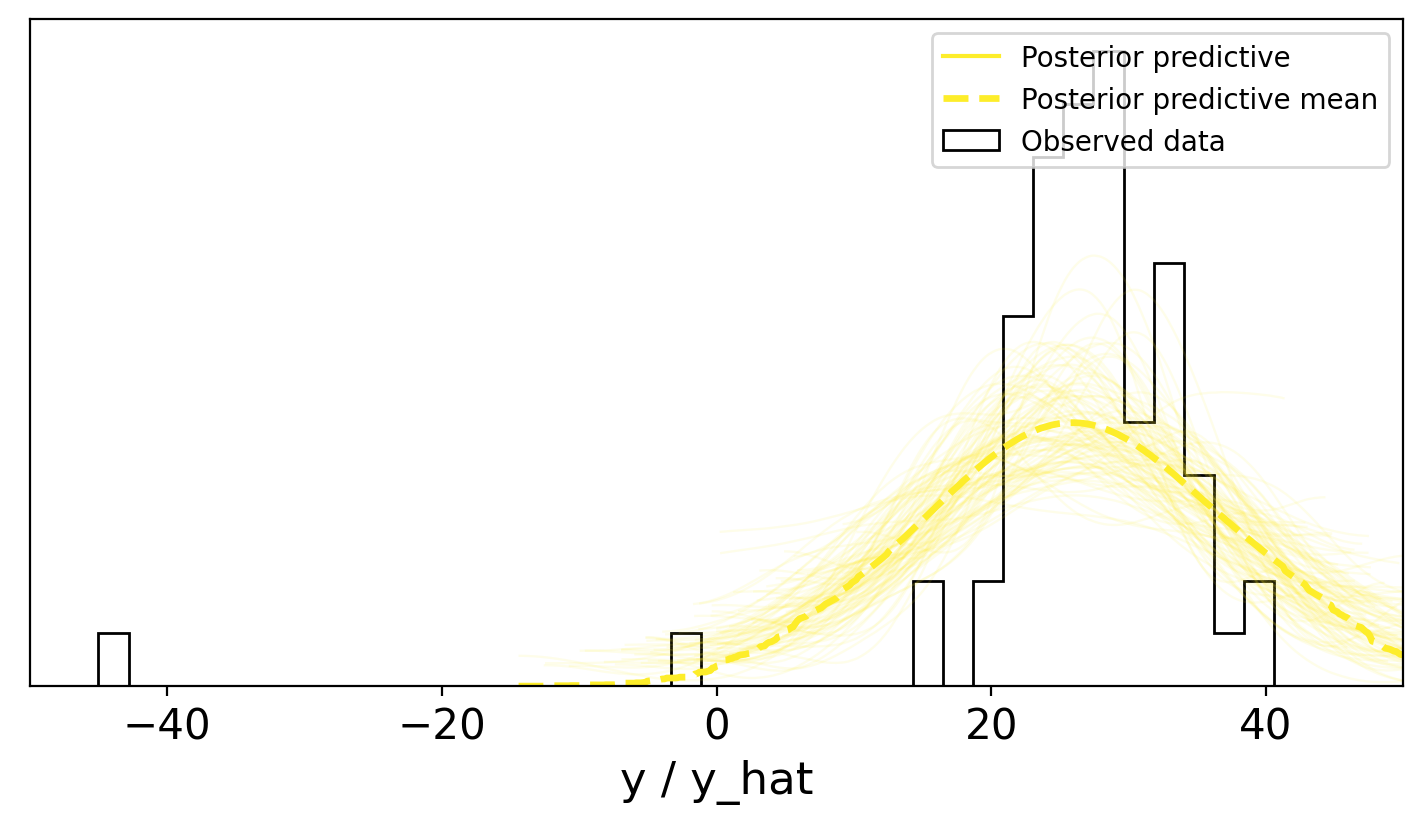

In [113]:
ax_ppc=az.plot_ppc(data = fit_id, alpha=0.1,color=mid,figsize=(7, 4),data_pairs={'y':'y_hat'},num_pp_samples=100,observed=False)
ax_ppc.set_xlim((-50,50))
ax_ppc.hist(V,bins=np.linspace(-45,45,42),histtype='step',edgecolor='black',density=True,label='Observed data')
ax_ppc.legend()
plt.show()

## Robust inference with Student-t likelihood
Student-t model is characterized by three parameters:
- $\nu$ - degrees of freedom
- $\mu$ - location
- $\sigma$ - scale

Degrees of freedom control the thickness of distribution tails, providing robustness to outlier, especially those that are hard to detect.

### Prior selection

Priors for location and scale are similar to the ones for mean and standard deviation in case of normal distribution. Degrees of freedom are either fixed as a design choice, or following "[Prior choice recommendation](https://github.com/stan-dev/stan/wiki/Prior-Choice-Recommendations)" page at [Stan Wiki](https://github.com/stan-dev/stan/wiki/) we use non-informative prior:
$$
p(\nu)=\mathrm{Gamma}(2,0.1)
$$


In [65]:
with open('newcomb_fit_2.stan', 'r') as file:
    print(file.read())

data {
  int N; //number of samples
  real y[N];//measurements
}

parameters {
  real<lower=0> sigma;
  real mu;
  real<lower = 0> nu;
}

model {
  target+=-2*log(sigma);
  target+=gamma_lpdf(nu|2,0.1);
  target+=student_t_lpdf(y|nu,mu,sigma);
}

generated quantities {
    vector[N] log_lik;
    real y_hat[N];
    for (j in 1:N) {
      log_lik[j] = student_t_lpdf(y[j]|nu,mu,sigma);
      y_hat[j] = student_t_rng(nu,mu,sigma);
    }
}


In [66]:
model2=CmdStanModel(stan_file='newcomb_fit_2.stan')

INFO:cmdstanpy:compiling stan program, exe file: /var/folders/96/_4tl8xsx4tx9rj0ykk82715h0000gn/T/tmpapc6ju9n/tmpokzh8fam
INFO:cmdstanpy:compiler options: stanc_options=None, cpp_options=None
INFO:cmdstanpy:compiled model file: /Users/jerzybaranowski/GitHub/KAIR-ISZ/public_lectures/Data Analytics/Topic 5 - Multiparameter models/Newcomb/newcomb_fit_2


In [67]:
fit2 = model2.sample(data = data,seed = 27042020)

INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:start chain 2
INFO:cmdstanpy:start chain 3
INFO:cmdstanpy:start chain 4
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:finish chain 2
INFO:cmdstanpy:finish chain 4
INFO:cmdstanpy:finish chain 3


In [68]:
fit2.diagnose()

INFO:cmdstanpy:Processing csv files: /var/folders/96/_4tl8xsx4tx9rj0ykk82715h0000gn/T/tmpc8_lqvdd/newcomb_fit_2-202104251800-1-1mrl30ee.csv, /var/folders/96/_4tl8xsx4tx9rj0ykk82715h0000gn/T/tmpc8_lqvdd/newcomb_fit_2-202104251800-2-betuoq4p.csv, /var/folders/96/_4tl8xsx4tx9rj0ykk82715h0000gn/T/tmpc8_lqvdd/newcomb_fit_2-202104251800-3-0jv01_wb.csv, /var/folders/96/_4tl8xsx4tx9rj0ykk82715h0000gn/T/tmpc8_lqvdd/newcomb_fit_2-202104251800-4-4g7t1elw.csv

Checking sampler transitions treedepth.
Treedepth satisfactory for all transitions.

Checking sampler transitions for divergences.
No divergent transitions found.

Checking E-BFMI - sampler transitions HMC potential energy.
E-BFMI satisfactory for all transitions.

Effective sample size satisfactory.

Split R-hat values satisfactory all parameters.

Processing complete, no problems detected.


'Processing csv files: /var/folders/96/_4tl8xsx4tx9rj0ykk82715h0000gn/T/tmpc8_lqvdd/newcomb_fit_2-202104251800-1-1mrl30ee.csv, /var/folders/96/_4tl8xsx4tx9rj0ykk82715h0000gn/T/tmpc8_lqvdd/newcomb_fit_2-202104251800-2-betuoq4p.csv, /var/folders/96/_4tl8xsx4tx9rj0ykk82715h0000gn/T/tmpc8_lqvdd/newcomb_fit_2-202104251800-3-0jv01_wb.csv, /var/folders/96/_4tl8xsx4tx9rj0ykk82715h0000gn/T/tmpc8_lqvdd/newcomb_fit_2-202104251800-4-4g7t1elw.csv\n\nChecking sampler transitions treedepth.\nTreedepth satisfactory for all transitions.\n\nChecking sampler transitions for divergences.\nNo divergent transitions found.\n\nChecking E-BFMI - sampler transitions HMC potential energy.\nE-BFMI satisfactory for all transitions.\n\nEffective sample size satisfactory.\n\nSplit R-hat values satisfactory all parameters.\n\nProcessing complete, no problems detected.'

In [69]:
mu2=fit2.stan_variable('mu')

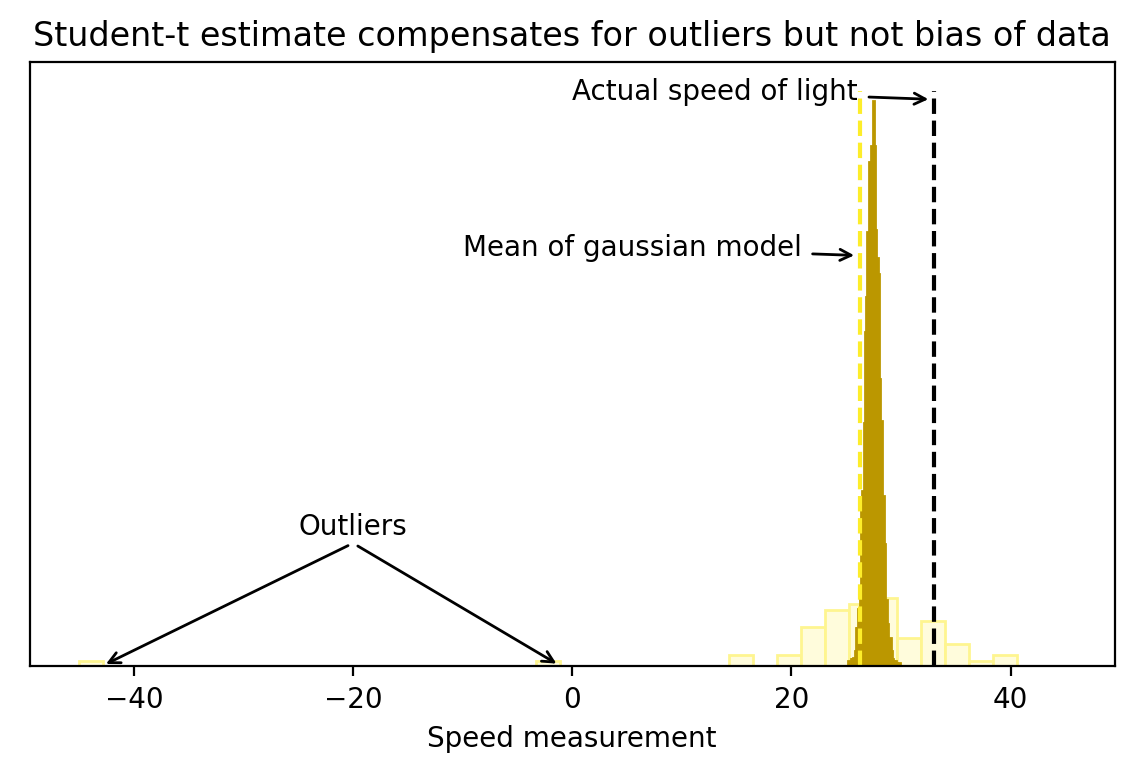

In [79]:
fig, ax = plt.subplots(1, 1, figsize=(7, 4))
gm=np.mean(mu)
ax.hist(V,bins=np.linspace(-45,45,42),color=light,edgecolor=light_highlight,density=True)
ax.hist(mu2,bins=40,color=dark,edgecolor=dark_highlight,density=True)
ax.plot([33,33],[0,0.7],color='black',linestyle='--')
ax.plot([gm,gm],[0,0.7],color=mid,linestyle='--')
ax.annotate('Actual speed of light',xy=(33,0.69),xytext=(0, 0.69),arrowprops={'arrowstyle':'->'})
ax.annotate('Mean of gaussian model',xy=(gm,0.5),xytext=(-10, 0.5),arrowprops={'arrowstyle':'->'})
ax.annotate('',xy=(-43,0),xytext=(-20, 0.15),arrowprops={'arrowstyle':'->'})
ax.annotate('',xy=(-1,0),xytext=(-20, 0.15),arrowprops={'arrowstyle':'->'})
ax.text(x=-25,y=0.16,s='Outliers')
ax.set_yticks([])
ax.set_xlabel('Speed measurement')
ax.set_title('Student-t estimate compensates for outliers but not bias of data')
plt.show(ax)

In [71]:
print('Mean: {:4.2f}'.format(np.mean(mu)))
print('95% confidence interval: ',['{:4.2f}'.format(k) for k in az.hdi(mu2,.95)])

Mean: 26.23
95% confidence interval:  ['26.23', '28.62']


In [87]:
az.summary(fit,var_names=['mu'],kind='stats',hdi_prob=.95)

,mean,sd,hdi_2.5%,hdi_97.5%
mu,26.23,1.334,23.772,28.919


We got a much tighter estimate and mean moves in right direction, but is still biased. There are limitation of what you can do with bad data.

### Posterior predictive check

In [114]:
fit2_id = az.from_cmdstanpy(posterior=fit2,
                           log_likelihood='log_lik',
                           posterior_predictive='y_hat',
                           observed_data={'y':data['y']} )

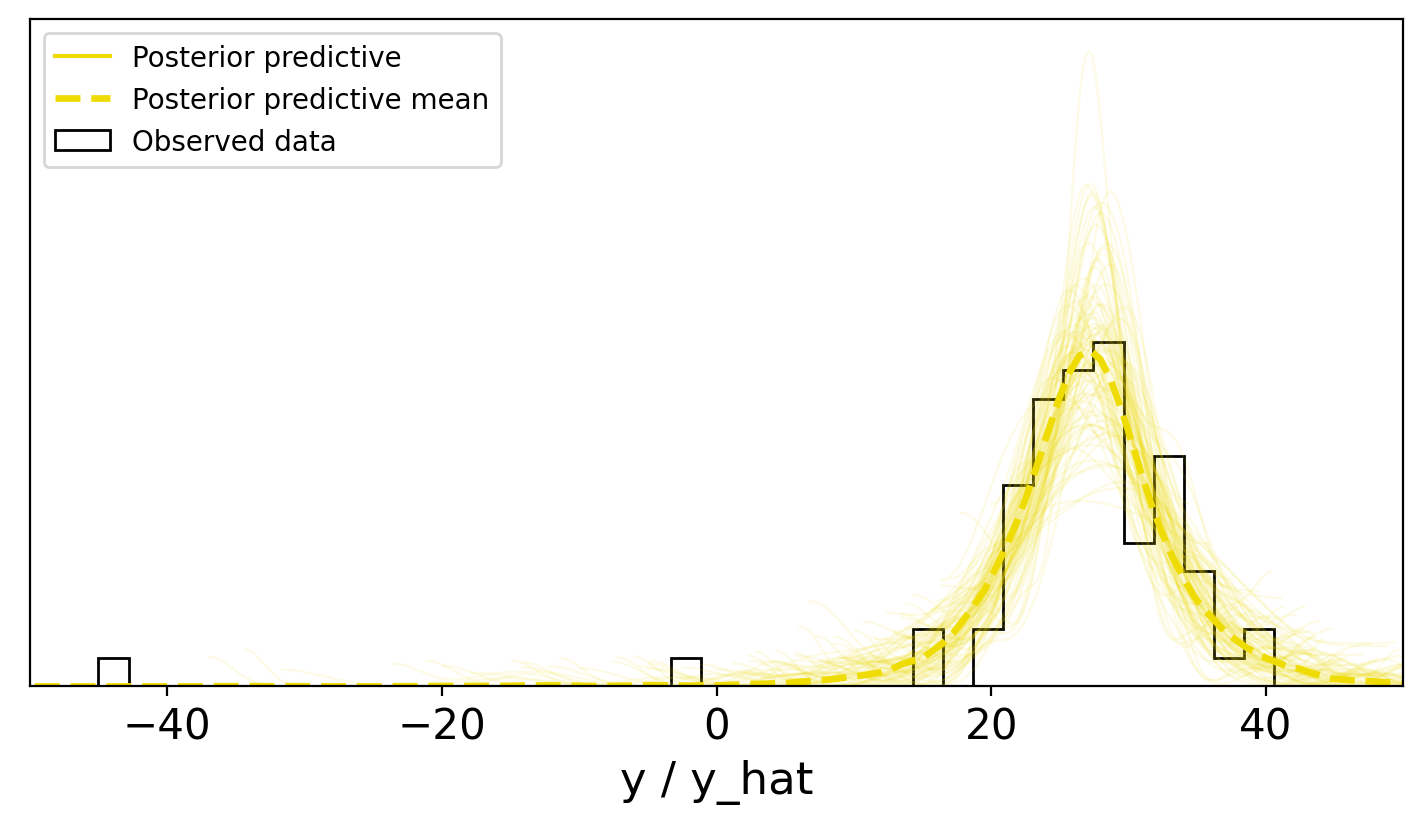

In [121]:
ax=az.plot_ppc(data = fit2_id, alpha=0.1,color=mid_highlight,figsize=(7, 4),data_pairs={'y':'y_hat'},num_pp_samples=100,observed=False,random_seed=123)
ax.set_xlim((-50,50))
ax.hist(V,bins=np.linspace(-45,45,42),histtype='step',edgecolor='black',density=True,label='Observed data')
ax.legend()
plt.show()

## Model comparison

Among multiple tools of  statistics we have possibilities of comparing models using certain metrics.
In this case we will consider well known leave-one-out cross validation.
Luckily in Bayesian statistics you do not need to do a repeated refitting of the model, but you can use an estimator based on Pareto Smoothed Importance Sampling.

In [119]:
model_compare = az.compare(dataset_dict ={'Gaussian model':fit_id,'Student-t model':fit2_id})
model_compare

/opt/anaconda3/envs/DA2021/lib/python3.7/site-packages/arviz/stats/stats.py:146: UserWarning: The default method used to estimate the weights for each model,has changed from BB-pseudo-BMA to stacking
  "The default method used to estimate the weights for each model,"
/opt/anaconda3/envs/DA2021/lib/python3.7/site-packages/arviz/stats/stats.py:656: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  "Estimated shape parameter of Pareto distribution is greater than 0.7 for "
/opt/anaconda3/envs/DA2021/lib/python3.7/site-packages/arviz/stats/stats.py:656: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should c

,rank,loo,p_loo,d_loo,weight,se,dse,warning,loo_scale
Student-t model,0,-219.439236,4.192071,0.000000,1.000000e+00,11.971330,0.000000,True,log
Gaussian model,1,-260.197840,14.597985,40.758605,3.733902e-12,30.269351,21.627224,True,log


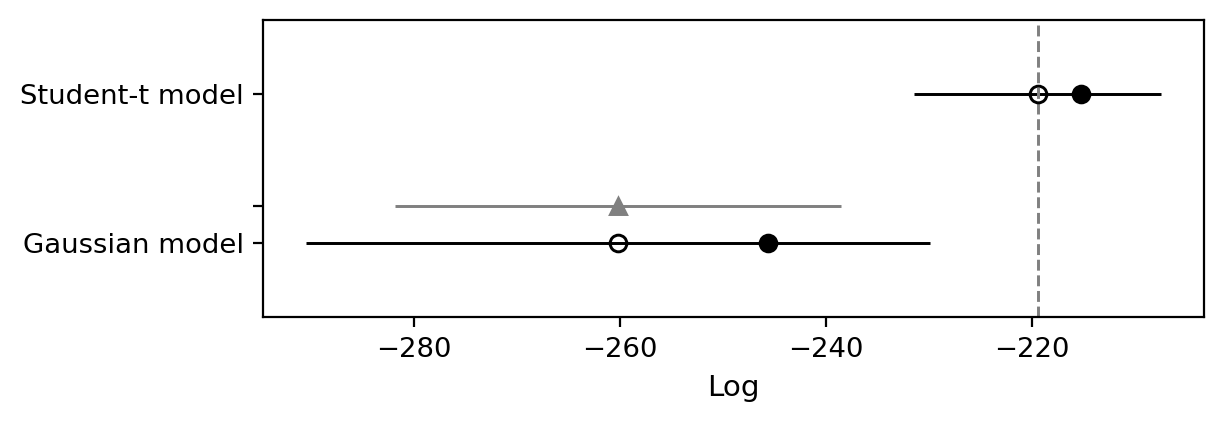

In [92]:
az.plot_compare(model_compare)
plt.show()